In [1]:
import wfdb 


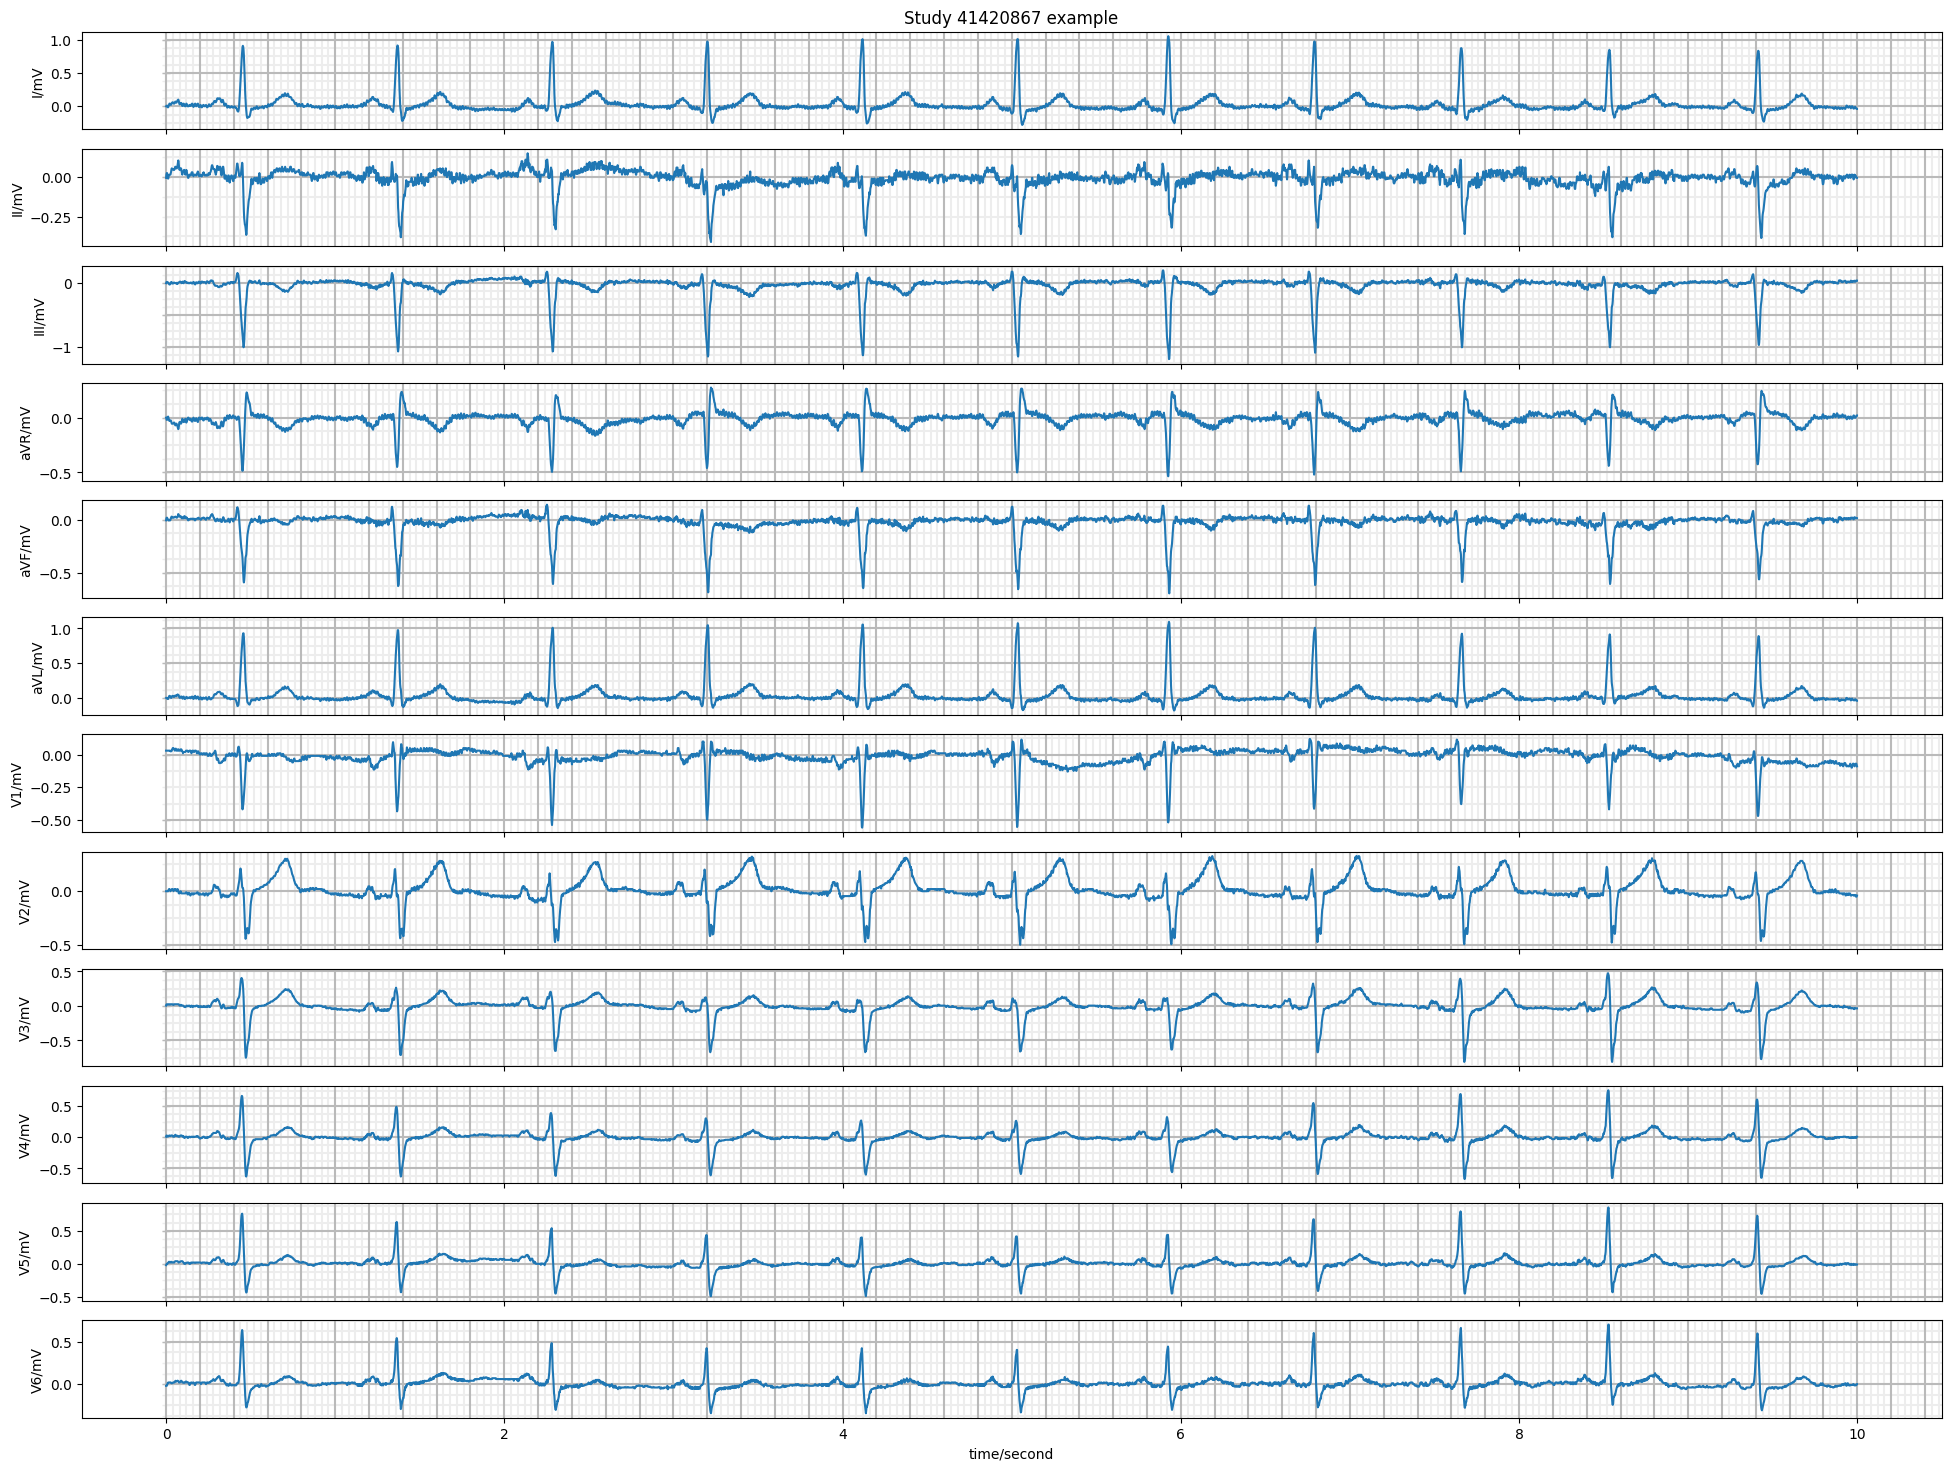

In [2]:
rec_path = 'D:/mimiciv_data/mimic-iv-ecg/1.0/preprocessed/MI_M_ecg/p1001/p10012438/41909781' 
rd_record = wfdb.rdrecord(rec_path) 
wfdb.plot_wfdb(record=rd_record, figsize=(24,18), title='Study 41420867 example', ecg_grids='all')

In [4]:
# 시퀀스 길이 출력
print("Sequence length:", rd_record.p_signal.shape[0])
# 채널 수 출력
print("Number of channels:", rd_record.p_signal.shape[1])

Sequence length: 5000
Number of channels: 12


In [6]:
# Let's start by opening the provided Python file to review its content and structure.
# We will identify if any modifications are needed for processing ECG data similar to the one shown in the image.

# Load the content of the Python file for review
file_path = 'C:/Users/yumi/projects/deepdaiv_clinical/MLP_FourierFeatures/mlp_mixerECG.py'
with open(file_path, 'r') as file:
    mlp_mixer_ecg_code = file.read()

# Output the content to review and discuss it
mlp_mixer_ecg_code

'import torch\nimport torch.nn as nn\n\n\n# Redefine the FeedForward module to ensure the input dimension matches the first Linear layer\'s expectation\nclass FeedForward(nn.Module):\n    def __init__(self, dim, hidden_dim, dropout=0.):\n\n        super().__init__()\n\n        self.net = nn.Sequential(\n            nn.Linear(dim, hidden_dim),  # Ensure the input dimension \'dim\' matches this layer\'s expectation\n            nn.GELU(),\n            nn.Dropout(dropout),\n            nn.Linear(hidden_dim, dim),\n            nn.Dropout(dropout)\n        )\n\n\n    def forward(self, x):\n\n        return self.net(x)\n\n\n# No changes needed for ECG\n# MixerBlock as it properly configures FeedForward\nclass ECGMixerBlock(nn.Module):\n\n    def __init__(self, dim, num_patch, token_dim, channel_dim, dropout=0.):\n\n        super().__init__()\n\n        # Token mixing\n        self.token_mix = nn.Sequential(\n            nn.LayerNorm(dim),\n            FeedForward(dim, token_dim, dropout)  # 